In [1]:
import matplotlib.pyplot as plt

import sunpy.data.sample
import sunpy.map
from sunpy.map.header_helper import make_heliographic_header

In [2]:

#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

# #import nustar_dem_prep as nu
import images_and_coalignment as iac
import time_interval_selection as tis
import nustar_utilities as nuutil
import gauss2D as g2d
import nustar_dem_prep as nu

import pickle
import pathlib
import importlib
from astropy import units as u
import numpy as np


In [3]:
key = '26-jul-16_1'

with open('all_targets.pickle', 'rb') as f:
    data = pickle.load(f)
    
method = data[key]['method']
ARDict = data[key]

id_dirs = ARDict['datapaths']
obsids = ARDict['obsids']
working_dir = ARDict['working_dir']

if method=='double':
    gauss_stats = ARDict['gauss_stats']
    sep_axis = gauss_stats[0][0]
else:
    sep_axis = ''

In [4]:
importlib.reload(iac)
aia_dir = '/Users/jmdunca2/sample_aia/sample_aia/'


aiamaps = iac.get_orbit_aiamaps(aia_dir, id_dirs, wave=94)   

/Users/jmdunca2/nustar/jul-2016/20201001001/
2016-07-26 19:22:53
['/Users/jmdunca2/sample_aia/sample_aia/aia.lev1.94A_2016-07-26T192200.12Z.image_lev1.fits']
/Users/jmdunca2/nustar/jul-2016/20201002001/
2016-07-26 20:59:35
['/Users/jmdunca2/sample_aia/sample_aia/aia.lev1.94A_2016-07-26T205900.12Z.image_lev1.fits']
/Users/jmdunca2/nustar/jul-2016/20201003001/
2016-07-26 22:52:38.010000
['/Users/jmdunca2/sample_aia/sample_aia/aia.lev1.94A_2016-07-26T225200.12Z.image_lev1.fits']


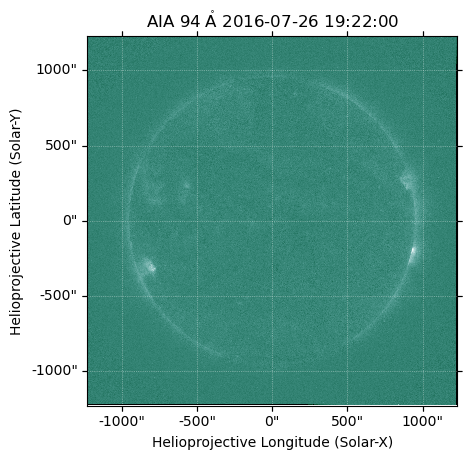

In [5]:
aia_map = sunpy.map.Map(aiamaps[0])

fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax)

In [6]:
shape = (720, 1440)
carr_header = make_heliographic_header(aia_map.date, aia_map.observer_coordinate, shape, frame='carrington')

In [7]:
outmap = aia_map.reproject_to(carr_header)

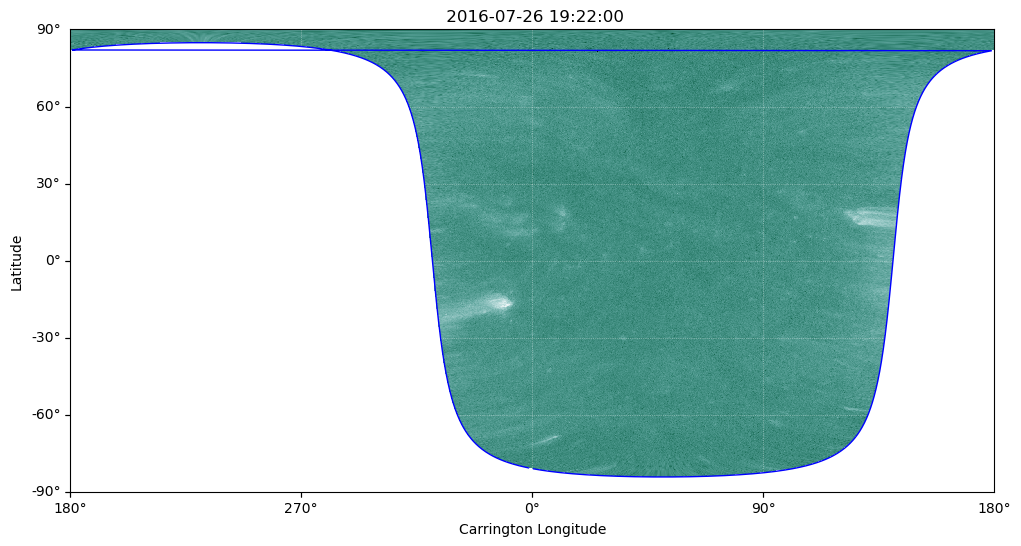

In [8]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection=outmap)
outmap.plot(axes=ax)
outmap.draw_limb(color='blue')


plt.show()
